In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import KNN as knn
import tqdm

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, Y_train, X_test, Y_test = load_CIFAR10(cifar10_dir)

In [4]:
# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


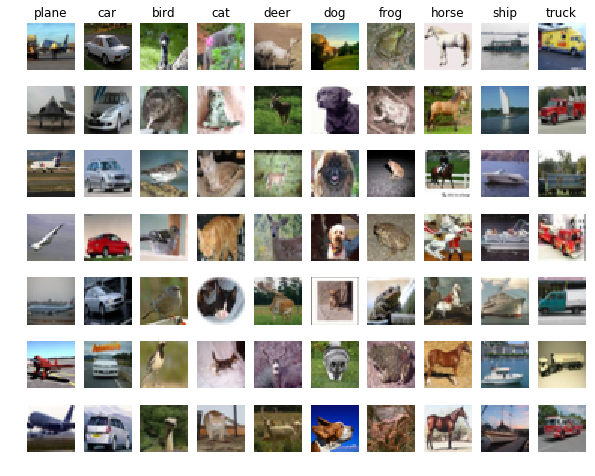

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
#Assign the number of training points
num_training=9990
#intialize an array to store the required training points and their labels 
X_train_required=[X_train[0]]
Y_train_required=[Y_train[0]]
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y) #get the indx of the points that have the label y
    idxs=idxs[:999] # get 999 of each label 
    X_train_required=np.concatenate((X_train_required,X_train[idxs]), axis=0) 
    Y_train_required=np.concatenate((Y_train_required,Y_train[idxs]), axis=0)
X_train_required=np.delete(X_train_required,0,0)
Y_train_required=np.delete(Y_train_required,0,0)
#randomly arrange the data inside the testing and label arrays 
Y_train_required, X_train_required=shuffle(Y_train_required, X_train_required, random_state=0)
#testing print 
print (Y_train_required.shape, X_train_required.shape)


(9990,) (9990, 32, 32, 3)


In [7]:
# Reshape the image data into rows
X_train_required= np.reshape(X_train_required, (X_train_required.shape[0], -1))
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
#testing print 
print (X_train.shape, X_test.shape, X_train_required.shape)

(50000, 3072) (10000, 3072) (9990, 3072)


In [8]:
#start of part 1 KNN 
num_folds=3
k_values = [1,3, 5,8 , 10, 20, 40, 50, 100]
#create a list of folds to save the 3 chunks of data seperatly
X_train_folds = []
y_train_folds = []
#devide the data points to three chunks where every class is equally represented in each chunck
for x in range(num_folds):
    X_train_temp=[X_train[0]] # intialize a temp array to hold 3330 of X_train points 
    Y_train_temp=[Y_train[0]]# intialize a temp array to hold 3330 of Y_train points 
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(Y_train_required == y) 
        idxs=idxs[(333*(x)):(333*(x+1))] # devide the data of each class into three chunks from 0:333 and 333:666 and 666:999
        X_train_temp=np.concatenate((X_train_temp,X_train_required[idxs]), axis=0) 
        Y_train_temp=np.concatenate((Y_train_temp,Y_train_required[idxs]), axis=0)
    X_train_temp=np.delete(X_train_temp,0,0)
    Y_train_temp=np.delete(Y_train_temp,0,0)
    TY, TX=shuffle(Y_train_temp,X_train_temp, random_state=x) # randomly organize the data inside Y and X arrays 
    X_train_folds.append(TX) # add the chunk to the train folds of x 
    y_train_folds.append(TY) # add the labels to the train folds of y
    #testing print 
    print (TY.shape, TY[6])

(3330,) 8
(3330,) 4
(3330,) 9


In [9]:

#create an instance of of KNN classifier
classifier=knn.NearestNeighbor()
#create a dictionary to store the lists of accurracies inside according to each K
Accuracies_k={}
for k in k_values:
    #intialize the list of accuracies for each K
    Accuracies_k[k]=[]
    for f in  range(num_folds):
        #choose two chunks that are not equal to F to be used for training 
        k_x_train = np.concatenate( [ X_train_folds[x] for x in range(num_folds) if x != f ])
        k_y_train = np.concatenate( [ y_train_folds[x] for x in range(num_folds) if x != f ])
        #choose the third left chunk to be used for validating 
        k_x_test  = X_train_folds [f]
        k_y_test  = y_train_folds [f]
        classifier.train(k_x_train,k_y_train)
        k_y_test_pred = classifier.predict(k_x_test ,k, 'L1' ) #the predicted array of the KNN
        right_prediction_sum= np.sum(k_y_test_pred == k_y_test) # get indxs of the true predicted points 
        accuracy= float(right_prediction_sum) / k_y_test.shape[0] # devide the number of the accurrate over the total number
        print ('k = %d, accuracy = %f' % (k,accuracy))
        Accuracies_k[k].append(accuracy)
        
    

k = 1, accuracy = 0.307808
k = 1, accuracy = 0.303904
k = 1, accuracy = 0.299700
k = 3, accuracy = 0.292793
k = 3, accuracy = 0.287387
k = 3, accuracy = 0.300300
k = 5, accuracy = 0.306306
k = 5, accuracy = 0.292492
k = 5, accuracy = 0.309910
k = 8, accuracy = 0.311111
k = 8, accuracy = 0.295495
k = 8, accuracy = 0.317718
k = 10, accuracy = 0.307207
k = 10, accuracy = 0.292492
k = 10, accuracy = 0.321622
k = 20, accuracy = 0.312312
k = 20, accuracy = 0.296697
k = 20, accuracy = 0.314414
k = 40, accuracy = 0.312613
k = 40, accuracy = 0.286186
k = 40, accuracy = 0.304505
k = 50, accuracy = 0.304505
k = 50, accuracy = 0.285586
k = 50, accuracy = 0.299099
k = 100, accuracy = 0.292192
k = 100, accuracy = 0.277477
k = 100, accuracy = 0.286186


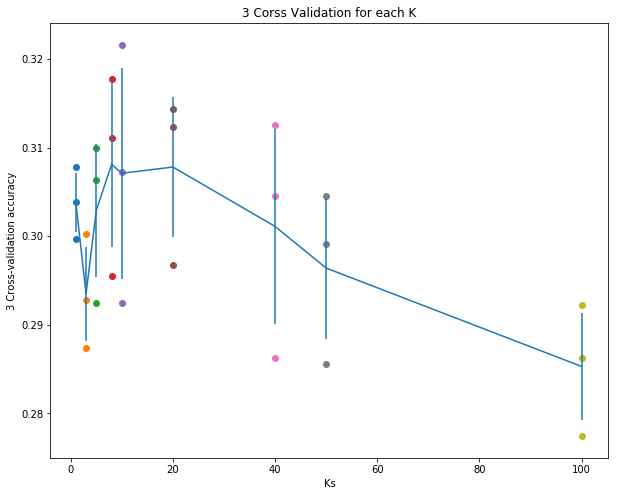

In [24]:
# plot the raw observations
for k in k_values:
  accuuracies_list = Accuracies_k[k]
  plt.scatter([k] * len(accuuracies_list), accuuracies_list)
    
# plot the trend line with error bars that correspond to standard deviation
Mean = np.array([np.mean(value) for k,value in sorted(Accuracies_k.items())])
standard_deviation = np.array([np.std(value) for k,value in sorted(Accuracies_k.items())])
plt.errorbar(k_values, Mean, yerr=standard_deviation)
plt.title('3 Corss Validation for each K')
plt.xlabel('Ks')
plt.ylabel('3 Cross-validation accuracy')
plt.show()

In [ ]:
import KNN as knn
#create an instance of of KNN classifier
classifier=knn.NearestNeighbor()
classifier.train(X_train_required,Y_train_required)
testing_prediction= classifier.predict(X_test,k=8)
right_prediction_sum= np.sum(testing_prediction == Y_test)


In [ ]:
testing_accuracy= float(right_prediction_sum) / 10000
print ("ACCR of the testing is: %f" %testing_accuracy)
print ()
CCRn = np.zeros(10)
for i in range(10):
        numCorrect = np.sum(testing_prediction[x] == Y_test[x] and testing_prediction[x] == i for x in range(X_test.shape[0]))
        CCRn[i] = float(numCorrect) / 1000
        print ('CCRn of %s is:  %f' % (classes[i], CCRn[i]))
